<a href="https://colab.research.google.com/github/OussemaOmri/Numerical-methods-for-finances/blob/main/TPs_m%C3%A9thodes_num%C3%A9riques_pour_la_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TPs Méthodes numériques pour la Finance - Oussema Omri - **






### **TP1: Simulation des variables aléatoires gaussiennes**

**TP1: Exercice 1**

L’objet de l’exercice consiste à se familiariser avec (VBA ou R ou Python) et générer des variables aléatoires uniformes. On Crée une fonction Function testBasegenerator (). A l’intérieur de cette fonction on génère des variables aléatoires uniformes. 
On trace la distribution d’une Uniforme sur [0, 1] et on calcule sa moyenne et sa variance numériquement et comparer aux résultats théoriques.


In [ ]:
#Importation des bibliothèques
from random import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import scipy.stats as stat

In [ ]:
#Définir la fonction: testBasegenerator
def testBasegenerator(a,b,c):
  return(np.random.uniform(a,b,c))

In [ ]:
#Running
testBasegenerator(0,1,100)

array([0.09493931, 0.02577328, 0.65932342, 0.83498644, 0.78555592,
       0.96255022, 0.77379666, 0.73279024, 0.65647793, 0.05268203,
       0.88525221, 0.93535312, 0.56949339, 0.76756586, 0.11025931,
       0.18237769, 0.01695231, 0.10383256, 0.51935637, 0.89447948,
       0.23773507, 0.92735701, 0.95577386, 0.10395693, 0.74139654,
       0.33646537, 0.22259651, 0.42063331, 0.98593488, 0.32709444,
       0.50225188, 0.87080408, 0.99189129, 0.65873067, 0.99235826,
       0.00273784, 0.28888975, 0.99221303, 0.94498736, 0.65576347,
       0.17918027, 0.65949454, 0.12106091, 0.05520243, 0.23607593,
       0.02856244, 0.92020532, 0.75277423, 0.46435056, 0.09564165,
       0.17155092, 0.71573598, 0.59140619, 0.69797997, 0.08359036,
       0.47495056, 0.36549036, 0.18708138, 0.78332174, 0.198417  ,
       0.62400313, 0.31436826, 0.77844091, 0.96684932, 0.55452566,
       0.63797171, 0.3180264 , 0.98326484, 0.48890262, 0.32525256,
       0.34969338, 0.94387371, 0.43501861, 0.74992039, 0.61480

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


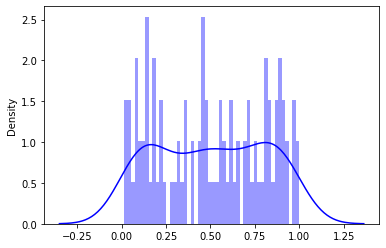

In [ ]:
#Plot
fig, ax = plt.subplots()
sns.distplot(testBasegenerator(0,1,100), bins=50, color="b", ax=ax)
plt.show()

In [ ]:
#Définir l'espérance
def esperance(a,b,c):
  valeurs = testBasegenerator(a,b,c)
  probabilites = 1/c
  e=0
  for i in range(c):
    e = e + probabilites*valeurs[i] 
  return e

In [ ]:
#Espérance: Valeur théorique :
f = lambda t : 1
x = sp.Symbol('x')
sp.integrate(x, (x,0,1))

1/2

In [ ]:
#Run
esperance( 0,1,100)

0.4752925570873657

==> La valeur pratique(0.47935115931492295) et la valeur théorique(1/2) trouvées par les codes ci-dessus sont très proches. Ils sont presque égales.

In [ ]:
#Définir la variance
def variance(a,b,c):
  var,N = 0,0
  valeurs = testBasegenerator(a,b,c)
  probabilites = 1/c
  e=esperance(a,b,c)
  for i in range(c):
    var = var+probabilites*(valeurs[i]-e)**2
  return(var)

In [ ]:
#Run
variance(0,1,100)

0.07613632468441596

==> La valeur pratique(0.08985708572067785) et la valeur théorique(1/12) trouvées par les codes ci-dessus sont très proches. Ils sont presque égales

**TP1: Exercice 2**

On écrit une fonction Function TestBoxMuller() qui simule deux variables aléatoires uniformes U1 et U2 et on calcule les deux variables gaussiennes indépendantes

In [ ]:
#Définir la fonction TestBoxMuller
def TestBoxMuller(a,b,c) :
  U1 = testBasegenerator(a,b,5000)
  U2 = testBasegenerator(a,b,5000)
  R = np.sqrt(-2 * np.log(U1))
  Theta = 2 * np.pi * U2
  X = R * np.cos(Theta)
  Y = R * np.sin(Theta)
  if c %2 == 0 :
    return X
  else :
    return Y

**TP1: Exercice 3**

L’objet de l’exercice consiste à créer une fonction qui gère la création de variables aléatoires N(0, 1). Il faut utiliser BaseGenerator pour les variables uniformes et implémenter la méthode Generate via BoxMuller. On Sauvegarde une des deux variables pour le prochain appel. On Calcule la moyenne et la variance numériquement puis on compare aux résultats théoriques.

In [ ]:
def Boxmuller (n) :
  L=[]
  for i in range (n) :
    L= TestBoxMuller(0,1,i)
  return L

In [ ]:
L=Boxmuller(10000)

In [ ]:
L

array([ 0.25114226,  1.08277598, -0.40411744, ...,  0.04392095,
       -0.74069377, -0.39046283])

In [ ]:
E=np.sum(L)/10000
V=np.var(L)
print("L'espérance est ",E)
print("La variance est",V)

L'espérance est  0.008020787014328134
La variance est 0.9955630996899717


=> Les résultats pratiques sont presques égaux aux résultats théoriques. L'espérance est presque égale à 0 et la variance est presque égale à 1.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2681: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


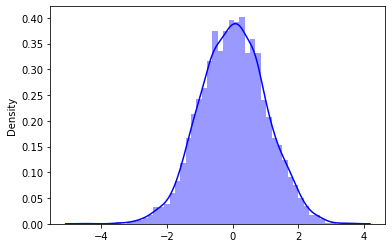

In [ ]:
fig, ax = plt.subplots()
sns.distplot(L, bins=50, color="B", ax=ax)
plt.show()

### **TP2: Simulation de solution d’équations différentielles stochastiques**

 **TP2: Exercice 1**

In [ ]:
def blackSholes(r,sigma):
  N=100
  T=1
  S0=100
  L=TestBoxMuller(r,sigma,N)
  S=np.ones(100)
  S[0]=S0
  for i in range(N-1):
    S[i+1]=S[i]+S[i]*r*0.01+sigma*np.sqrt(0.01)*(L[i+1]-L[i])*S[i]
  return(S)  

Fixant r et variant sigma

In [ ]:
#sigma=0.2 et r=0.1
sigma=0.2
r=0.1
s=[]
moy=[]
for k in range(200):
  s.append(blackSholes(r,sigma))
for j in range(200):
  moy.append(np.sum(s[k]/len(s[k])))
moyenne=np.sum(moy)/200
print(moyenne)

105.27308913360517


In [ ]:
#sigma=0.3 et r=0.1
sigma=0.3
r=0.1
s=[]
moy=[]
for k in range(200):
  s.append(blackSholes(r,sigma))
for j in range(200):
  moy.append(np.sum(s[k]/len(s[k])))
moyenne=np.sum(moy)/200
print(moyenne)

104.29476310736665


In [ ]:
#sigma=0.4 et r=0.1
sigma=0.4
r=0.1
s=[]
moy=[]
for k in range(200):
  s.append(blackSholes(r,sigma))
for j in range(200):
  moy.append(np.sum(s[k]/len(s[k])))
moyenne=np.sum(moy)/200
print(moyenne)

98.87910471562394


Fixant sigma et variant r

In [ ]:
#sigma=0.2 et r=0.05
sigma=0.2
r=0.05
s=[]
moy=[]
for k in range(200):
  s.append(blackSholes(r,sigma))
for j in range(200):
  moy.append(np.sum(s[k]/len(s[k])))
moyenne=np.sum(moy)/200
print(moyenne)

103.3639470609315


In [ ]:
#sigma=0.2 et r=0.1
sigma=0.2
r=0.1
s=[]
moy=[]
for k in range(200):
  s.append(blackSholes(r,sigma))
for j in range(200):
  moy.append(np.sum(s[k]/len(s[k])))
moyenne=np.sum(moy)/200
print(moyenne)

104.59880926559124


In [ ]:
#sigma=0.2 et r=0.2
sigma=0.2
r=0.2
s=[]
moy=[]
for k in range(200):
  s.append(blackSholes(r,sigma))
for j in range(200):
  moy.append(np.sum(s[k]/len(s[k])))
moyenne=np.sum(moy)/200
print(moyenne)

110.579413594796


Selon les résultats affichés ci-dessus on ne peut pas faire une interprétation selon la
variation de sigma et r et leurs effets sur la variation de la moyenne parce qu'on utilise des
variables aléatoires dans la fonction BoxMuller. Donc on affiche la variation de la
moyenne selon la variation de sigma puis r sur une courbe comme affiché ci-dessous

In [ ]:
def moyenne(r,sigma):
  y=[]
  s=[]
  moy=[]
  moyenne=0
  for k in range(200):
    s.append(blackSholes(r,sigma))
  for j in range(200):
    moy.append(np.sum(s[k]/len(s[k])))
  return(np.sum(moy)/200)

Fixant r et variant sigma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


les sigma:  [ 0.1         0.40408163  0.70816327  1.0122449   1.31632653  1.62040816
  1.9244898   2.22857143  2.53265306  2.83673469  3.14081633  3.44489796
  3.74897959  4.05306122  4.35714286  4.66122449  4.96530612  5.26938776
  5.57346939  5.87755102  6.18163265  6.48571429  6.78979592  7.09387755
  7.39795918  7.70204082  8.00612245  8.31020408  8.61428571  8.91836735
  9.22244898  9.52653061  9.83061224 10.13469388 10.43877551 10.74285714
 11.04693878 11.35102041 11.65510204 11.95918367 12.26326531 12.56734694
 12.87142857 13.1755102  13.47959184 13.78367347 14.0877551  14.39183673
 14.69591837 15.        ]
les moyennes: [105.11569772076793, 98.40157028349142, 93.87698320490675, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


<function matplotlib.pyplot.show>

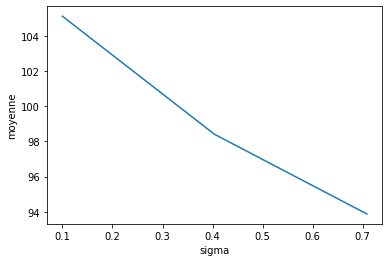

In [ ]:
sigma=np.linspace(0.1,15,50)
moyen=[]
for i in range(len(sigma)):
  m=moyenne(0.1,sigma[i])
  moyen.append(m)
print("les sigma: ",sigma)
print("les moyennes:",moyen)
plt.xlabel("sigma")
plt.ylabel("moyenne")
plt.plot(sigma,moyen)
plt.show

fixant sigma et variant r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


les r:  [ 0.1         0.40408163  0.70816327  1.0122449   1.31632653  1.62040816
  1.9244898   2.22857143  2.53265306  2.83673469  3.14081633  3.44489796
  3.74897959  4.05306122  4.35714286  4.66122449  4.96530612  5.26938776
  5.57346939  5.87755102  6.18163265  6.48571429  6.78979592  7.09387755
  7.39795918  7.70204082  8.00612245  8.31020408  8.61428571  8.91836735
  9.22244898  9.52653061  9.83061224 10.13469388 10.43877551 10.74285714
 11.04693878 11.35102041 11.65510204 11.95918367 12.26326531 12.56734694
 12.87142857 13.1755102  13.47959184 13.78367347 14.0877551  14.39183673
 14.69591837 15.        ]
les moyennes: [104.13526996224253, 123.65453257670946, 143.7616420507486, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


<function matplotlib.pyplot.show>

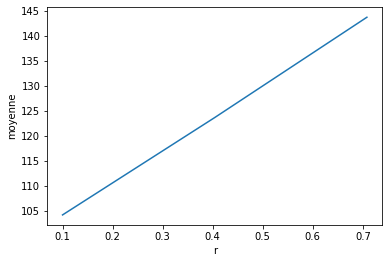

In [ ]:
r=np.linspace(0.1,15,50)
moyen=[]
for i in range(len(r)):
  m=moyenne(r[i],0.2)
  moyen.append(m)
print("les r: ",r)
print("les moyennes:",moyen)
plt.xlabel("r")
plt.ylabel("moyenne")
plt.plot(sigma,moyen)
plt.show


On remarque que la courbe de variation de la moyenne si r est fixe est presque une
droite et la deuxième courbe (si sigma est fixe) admet une grande variation donc la
fonction Black & Sholes est indépendante par rapport à sigma.

**TP2: Exercice 2**

In [ ]:
# Implémentation de la fonction pricing
def pricing (S0,k,sigma,r,T) :
  d1=(np.log(S0/k)+(r+(sigma**2)/2)*(T-0))/(sigma*np.sqrt(T-0))
  d2=d1-sigma*np.sqrt(T)
  u= S0*stat.norm.cdf(d1,loc=0,scale=1) - k*np.exp(-r*(T))*stat.norm.cdf(d2,loc=0,scale=1)
  return u

Call européen avec: S0 = 100, K = 100, σ = 0, 2, r = 0, 1, T = 1


In [ ]:
pricing(100,100,0.2,0.1,1)

13.269676584660893

In [ ]:
def MonteCarlo (S0,k,sigma,r,T,n):
  CE =0
  t= Boxmuller(n)
  L=[t[i] for i in range (n)]
  for i in range(n) :
    st=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*L[i])
    if (st>k) :
      call=st-k
    else :
      call=0
    CE=CE+call
  CE=CE/n
  return CE

MonteCarlo avec: S0 = 100, K = 100, σ = 0, 2, r = 0, 1, T = 1, n = 100

In [ ]:
MonteCarlo(100,100,0.2,0.1,1,100)

12.910746458821668

La valeur empérique est très proche de la valeur réelle

In [ ]:
# variation de S0 :
for S0 in (100,200,300,400) :
  print('S0 = ', S0)
  print(MonteCarlo(S0,100,0.2,0.1,1,100))
  print("\n")

S0 =  100
11.841256567978167


S0 =  200
125.86678804760652


S0 =  300
233.79095771998385


S0 =  400
348.8278650679655




In [ ]:
# variation de sigma :
for sigma in (0.2,0.3,0.4,0.5) :
  print('sigma = ', sigma)
  print(MonteCarlo(100,100,sigma,0.1,1,100))
  print("\n")

sigma =  0.2
15.239972430063746


sigma =  0.3
16.579060674992537


sigma =  0.4
22.654898023530492


sigma =  0.5
24.27956882184217




In [ ]:
# variation de r :
for r in (0.1,0.2,0.3,0.4) :
  print('r = ', r)
  print(MonteCarlo(100,100,0.2,r,1,100))
  print("\n")

r =  0.1
14.152159286758412


r =  0.2
22.816838185440197


r =  0.3
32.150815777534824


r =  0.4
49.15096085969148




In [ ]:
# variation de T :
for T in (1,2,3,4) :
  print('T = ', T)
  print(MonteCarlo(100,100,0.2,0.1,T,100))
  print("\n")

T =  1
15.740699066836061


T =  2
27.390926213922068


T =  3
45.243964013216015


T =  4
46.655284382250656




La valeur du call européen varie si on varie r, sigma, S0 et T. Ainsi, elle dépend de ces
paramètres.